## Индивидуальное задание 
Считать цветное изобразение изображение и выполнить:

1. Провести охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной
2. "Обрезать" изображение по минимальному квадрату
3. Выполнить аппроксимацию контура, полагая epsilon = 1%, epsilon = 5% и epsilon = 10%.

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Загрузим изображение и найдем его контур



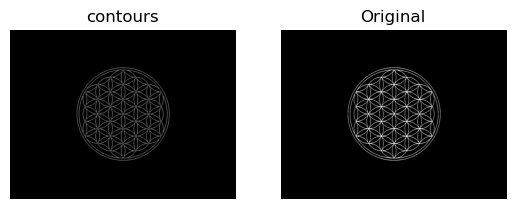

In [4]:
img = cv2.imread('111.jpg', 0) 
ret,thresh = cv2.threshold(img,128,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

cont = np.zeros_like(img)
cv2.drawContours(cont, contours, -1, 255, 1)

plt.subplot(121)
plt.title('contours')
plt.axis('off')
plt.imshow(cont, cmap='gray');

mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, 255, -1) 

plt.subplot(122)
plt.title('Original')
plt.axis('off')
plt.imshow(mask, cmap='gray');

Проведем охват изображения в прямоугольник, повернутый так, чтобы площадь этого прямоугольника была минимальной.



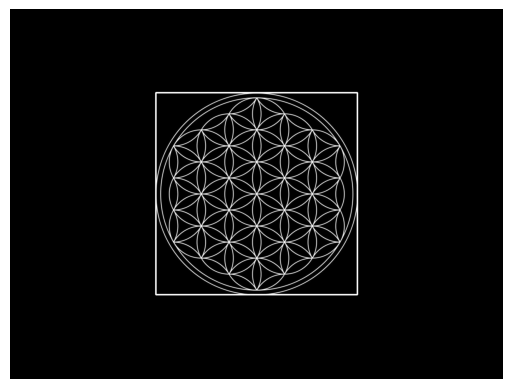

In [10]:
cnt = contours[0]
rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)
box = np.int0(box)

imp = cv2.drawContours(img, [box], 0,255, 3)

plt.axis('off')
plt.imshow(imp, cmap='gray');

Повернем изображение так, чтобы стороны прямоугольника были параллельны осям



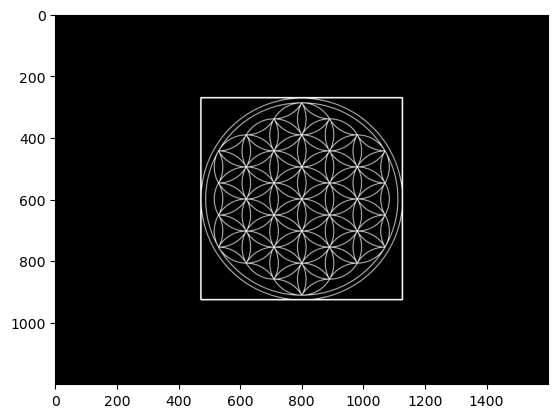

In [11]:
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),0,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst, cmap='gray');

Заново найдем контур у уже объведенного изображения



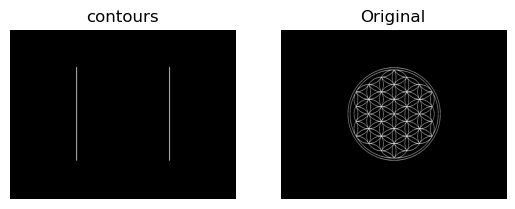

In [12]:
ret,thresh = cv2.threshold(dst,128,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

cont = np.zeros_like(img)
cv2.drawContours(cont, contours[0], -1, 255, 3)

plt.subplot(121)
plt.title('contours')
plt.axis('off')
plt.imshow(cont, cmap='gray');

plt.subplot(122)
plt.title('Original')
plt.axis('off')
plt.imshow(mask, cmap='gray');

"Обрезанем" изображение по контуру



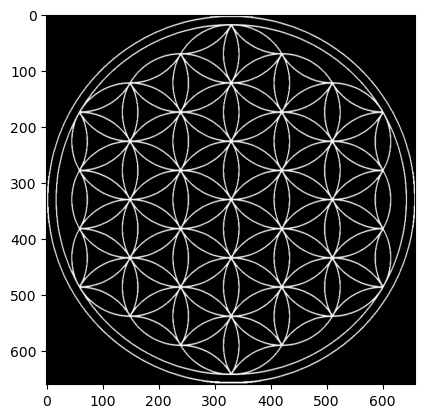

In [13]:
out = np.zeros_like(dst)
out[mask == 255] = dst[mask == 255]

(y, x) = np.where(mask == 255)
min_y = np.min(contours[0],  axis=0)[0][1]
min_x = np.min(contours[0],  axis=0)[0][0]
max_y = np.max(contours[0],  axis=0)[0][1]
max_x = np.max(contours[0],  axis=0)[0][0]

out = out[min_y:max_y+1, min_x:max_x+1]

#plt.axis('off')
plt.imshow(out, cmap='gray');

Выполнить аппроксимацию контура, полагая epsilon = 1%, epsilon = 5% и epsilon = 10%.


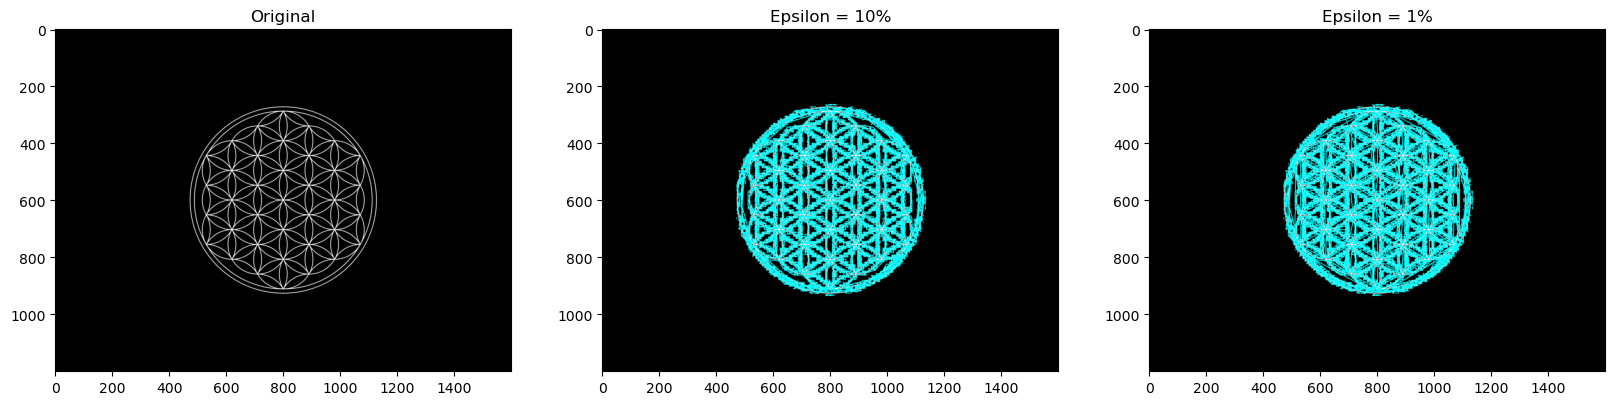

In [22]:
img = cv2.imread('111.jpg', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 3)

imag = cv2.imread('111.jpg')

f = plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img,'gray')

plt.subplot(1,3,2)
plt.title('Epsilon = 10%')
for i in range(np.size(contours)):
    cnt = contours [i]
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    cv2.drawContours(imag,[approx],-1,(0,255,255),2)
plt.imshow(imag)

plt.subplot(1,3,3)
plt.title('Epsilon = 1%')

for i in range(np.size(contours)):
    cnt = contours [i]
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    cv2.drawContours(imag,[approx],-1,(0,255,255),2)
plt.imshow(imag)
plt.show();